In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import common

FS = (10, 7)

In [2]:
def lyrics_frame(om):
    lyrs = om[(om['raw'] > 2) & om['scraped']].copy()
    lyrs['ratio'] = lyrs['raw'] / lyrs['comp']
    lyrs['date'] = pd.to_datetime(lyrs['date'])
    lyrs['year'] = lyrs['date'].apply(lambda d: d.year)
    lyrs['dateint'] = lyrs['date'].astype(int)
    return lyrs
    
om = common.get_omnisong()
lyrs = lyrics_frame(om)

In [3]:
genred = lyrs[~lyrs['genre'].isnull()]
print "{} scraped songs have genre annotations ({} songs total)".format(
    len(genred), len(om[~om['genre'].isnull()])
)

4712 scraped songs have genre annotations (6339 songs total)


In [4]:
genre_counts = genred['genre'].value_counts()
genre_counts

Rock          1719
Pop           1152
RnB            802
Country        637
Rap            192
Electronic      53
Blues           32
Jazz            31
Folk            30
Latin           28
Reggae          20
Metal            8
World            5
New Age          3
Name: genre, dtype: int64

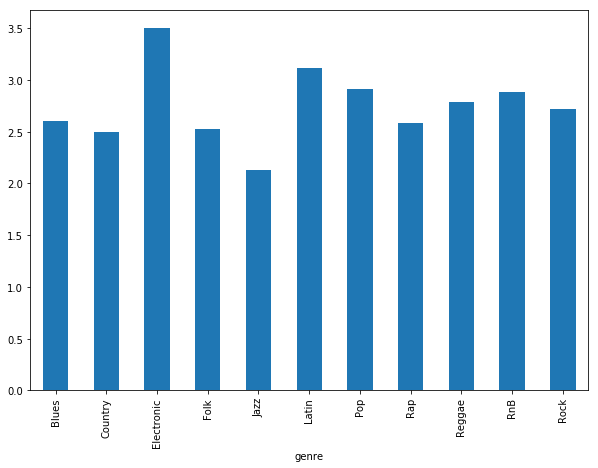

In [5]:
major = genre_counts[genre_counts > 15]
genred[genred['genre'].isin(major.index)].groupby('genre')['ratio'].mean().plot.bar(figsize=FS);

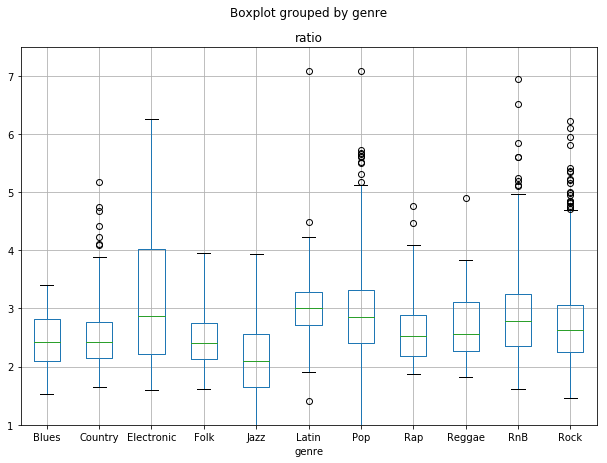

In [6]:
ax = genred[genred['genre'].isin(major.index)].boxplot(by='genre', column='ratio', figsize=FS, whis=2);
ax.set_ylim(1, 7.5);